In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-90.000, high=90.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Id the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

648

In [7]:
# Import the requests library
import requests

# Import the API key.
from config import weather_api_key

In [8]:
## Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b86ed79d889c181e845cf1b8664d00bb


In [9]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [10]:
# Ceate an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval    ")
print("----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count +=1
        
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                        "Lat": city_lat,
                        "Lng": city_lng,
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass


# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval    
----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | berlevag
Processing Record 3 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 4 of Set 1 | chuy
Processing Record 5 of Set 1 | tena
Processing Record 6 of Set 1 | mantua
Processing Record 7 of Set 1 | misratah
Processing Record 8 of Set 1 | comodoro rivadavia
Processing Record 9 of Set 1 | iqaluit
Processing Record 10 of Set 1 | zhezkazgan
Processing Record 11 of Set 1 | sao filipe
Processing Record 12 of Set 1 | dingle
Processing Record 13 of Set 1 | kildinstroy
Processing Record 14 of Set 1 | igarka
Processing Record 15 of Set 1 | altay
Processing Record 16 of Set 1 | arraial do cabo
Processing Record 17 of Set 1 | nizwa
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | tasiilaq
Processing Record 21 of Set 1 | bahia de caraquez
Processing Record 22 of Set 1 | bussel

Processing Record 39 of Set 4 | grand gaube
Processing Record 40 of Set 4 | hobyo
Processing Record 41 of Set 4 | buchanan
Processing Record 42 of Set 4 | prenzlau
Processing Record 43 of Set 4 | pauini
Processing Record 44 of Set 4 | knysna
Processing Record 45 of Set 4 | dikson
Processing Record 46 of Set 4 | schotten
Processing Record 47 of Set 4 | niono
Processing Record 48 of Set 4 | louisbourg
City not found. Skipping...
Processing Record 49 of Set 4 | alghero
Processing Record 50 of Set 4 | jardim
Processing Record 1 of Set 5 | yanam
Processing Record 2 of Set 5 | kisanga
Processing Record 3 of Set 5 | jalpaiguri
Processing Record 4 of Set 5 | clyde river
Processing Record 5 of Set 5 | krasnokamsk
Processing Record 6 of Set 5 | chinsali
Processing Record 7 of Set 5 | sumkino
Processing Record 8 of Set 5 | rudnichnyy
Processing Record 9 of Set 5 | saint george
Processing Record 10 of Set 5 | turayf
Processing Record 11 of Set 5 | mitsamiouli
Processing Record 12 of Set 5 | poroso

Processing Record 26 of Set 8 | semirom
Processing Record 27 of Set 8 | svetlyy
Processing Record 28 of Set 8 | kutum
Processing Record 29 of Set 8 | radstadt
Processing Record 30 of Set 8 | mapiripan
Processing Record 31 of Set 8 | salalah
Processing Record 32 of Set 8 | corinto
Processing Record 33 of Set 8 | kumukh
Processing Record 34 of Set 8 | pyaozerskiy
Processing Record 35 of Set 8 | tukrah
Processing Record 36 of Set 8 | xaxim
Processing Record 37 of Set 8 | cayeli
Processing Record 38 of Set 8 | maravilha
Processing Record 39 of Set 8 | maarianhamina
Processing Record 40 of Set 8 | gibara
Processing Record 41 of Set 8 | kannod
Processing Record 42 of Set 8 | margate
Processing Record 43 of Set 8 | etah
Processing Record 44 of Set 8 | bibiani
Processing Record 45 of Set 8 | carnarvon
Processing Record 46 of Set 8 | montoro
Processing Record 47 of Set 8 | paoua
Processing Record 48 of Set 8 | gravdal
Processing Record 49 of Set 8 | harsin
Processing Record 50 of Set 8 | khash


Processing Record 19 of Set 12 | orel
Processing Record 20 of Set 12 | safwah
City not found. Skipping...
Processing Record 21 of Set 12 | kudahuvadhoo
Processing Record 22 of Set 12 | gwadar
Processing Record 23 of Set 12 | abiy adi
City not found. Skipping...
Processing Record 24 of Set 12 | orcopampa
Processing Record 25 of Set 12 | cockburn town
Processing Record 26 of Set 12 | san andres
Processing Record 27 of Set 12 | khandbari
Processing Record 28 of Set 12 | meulaboh
Processing Record 29 of Set 12 | tigre
Processing Record 30 of Set 12 | maldonado
Processing Record 31 of Set 12 | arlit
Processing Record 32 of Set 12 | puerto pinasco
City not found. Skipping...
Processing Record 33 of Set 12 | belyy yar
Processing Record 34 of Set 12 | hualmay
Processing Record 35 of Set 12 | villa bruzual
Processing Record 36 of Set 12 | yar-sale
Processing Record 37 of Set 12 | miedzychod
Processing Record 38 of Set 12 | mutsamudu
City not found. Skipping...
Processing Record 39 of Set 12 | s

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.0970,-79.2353,73.02,29,0,8.05,US,2022-06-05 17:16:53
1,Berlevag,70.8578,29.0864,46.35,76,100,4.61,NO,2022-06-05 17:16:53
2,Chuy,-33.6971,-53.4616,64.99,73,93,3.24,UY,2022-06-05 17:16:54
3,Tena,-0.9833,-77.8167,69.96,88,100,1.43,EC,2022-06-05 17:16:54
4,Mantua,45.1667,10.7833,87.10,53,23,5.01,IT,2022-06-05 17:16:55


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jamestown,US,2022-06-05 17:16:53,42.0970,-79.2353,73.02,29,0,8.05
1,Berlevag,NO,2022-06-05 17:16:53,70.8578,29.0864,46.35,76,100,4.61
2,Chuy,UY,2022-06-05 17:16:54,-33.6971,-53.4616,64.99,73,93,3.24
3,Tena,EC,2022-06-05 17:16:54,-0.9833,-77.8167,69.96,88,100,1.43
4,Mantua,IT,2022-06-05 17:16:55,45.1667,10.7833,87.10,53,23,5.01


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

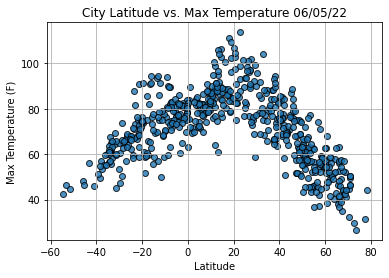

In [16]:
# Import time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show Plot.
plt.show()

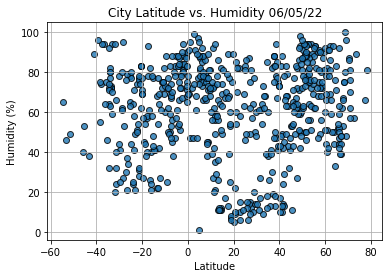

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot..
plt.show()


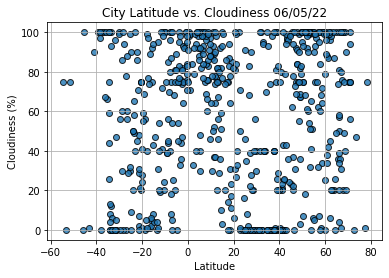

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot..
plt.show()


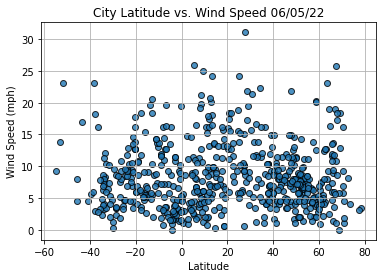

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot..
plt.show()